In [1]:
import torch
from PIL import Image
from transformers import SamModel, SamProcessor
import matplotlib.pyplot as plt
import numpy as np

/opt/anaconda3/envs/mls/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
/opt/anaconda3/envs/mls/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = SamModel.from_pretrained("facebook/sam-vit-base")
model = model.to(torch.float32)
model = model.to(device)

processor = SamProcessor.from_pretrained("facebook/sam-vit-base")



cpu


In [3]:
def plot_overlay(orig_img, mask_tensor):

    img = Image.open(orig_img).convert("RGB")
    img_np = np.array(img)

    # convert mask tensor -> numpy
    mask_np = mask_tensor.numpy()

    plt.figure(figsize=(8,8))
    plt.imshow(img_np)                     # background image
    plt.imshow(mask_np, cmap="jet", alpha=0.6)  # overlay mask
    plt.axis("off")
    plt.show()

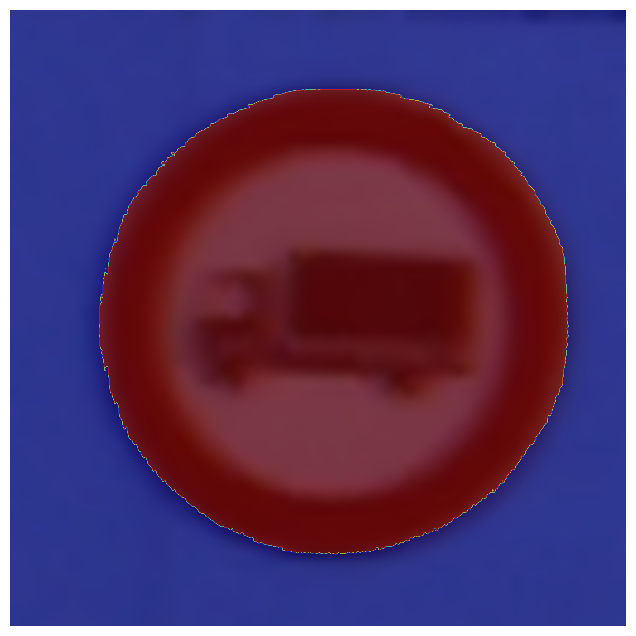

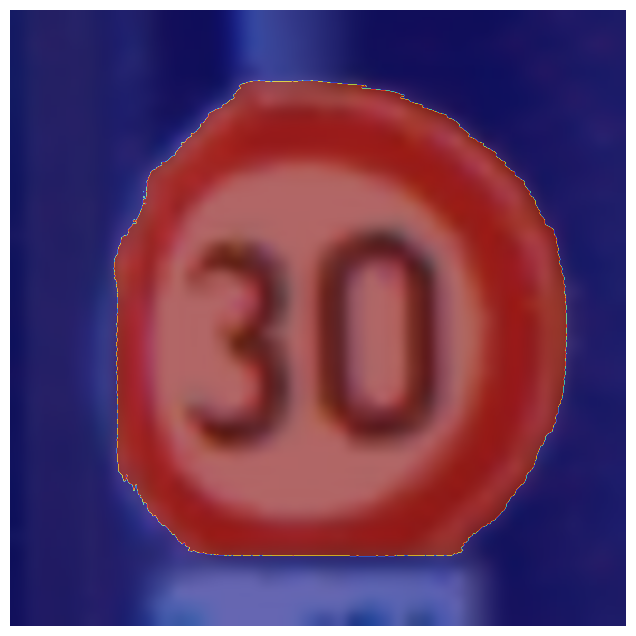

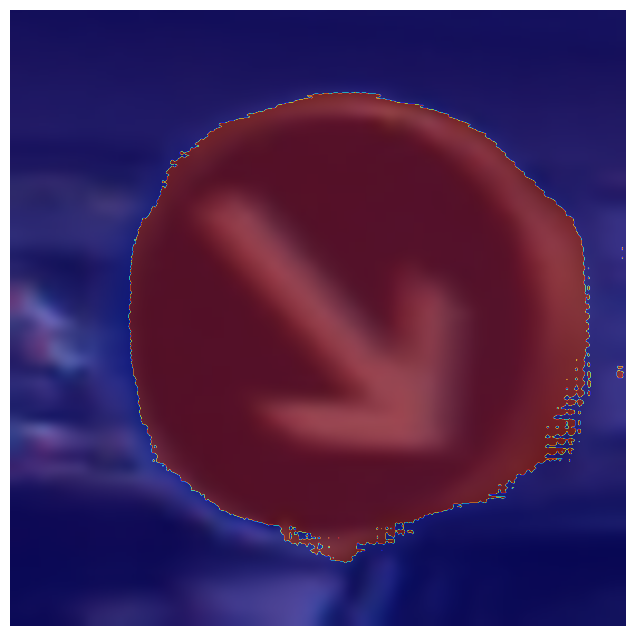

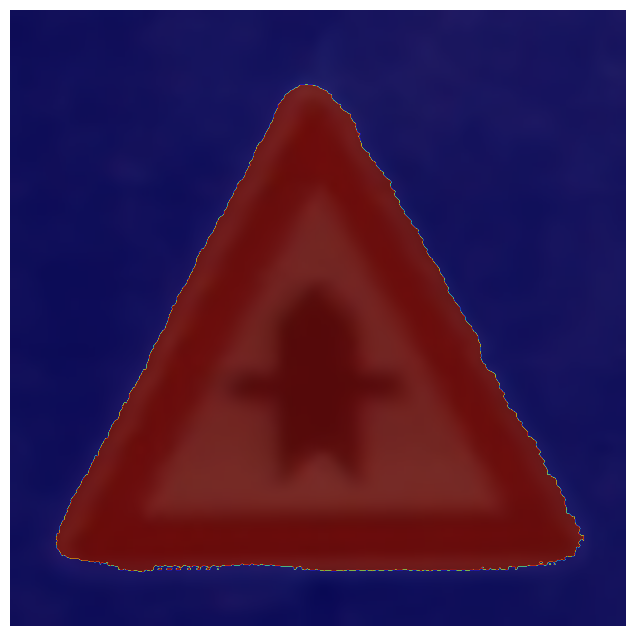

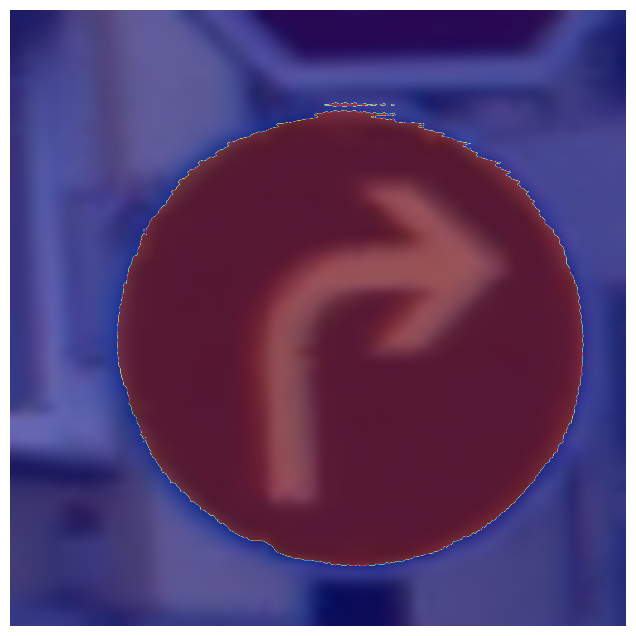

In [18]:
data = torch.load("sam_outputs.pt", map_location="cpu")

inputs = data["inputs"]
masks = data["masks"]
scores = data["scores"]
files = data["files"]

mask_id = 0 # [0,1,2] because there are always 3 masks generated

for i, orig_img in enumerate(files):
    # force int64 sizes
    original = inputs[i]["original_sizes"].to(torch.long).cpu()
    reshaped = inputs[i]["reshaped_input_sizes"].to(torch.long).cpu()


    masks_processed = processor.image_processor.post_process_masks(
        masks[i],
        original,
        reshaped
    )
    mask_tensor = masks_processed[0][0][mask_id] # original masks has shape (batch_size, number_of_masks, H, W)

    plot_overlay(files[i], mask_tensor)
